In [1]:
#Version compatibility between pytorch and cuda is important, as it is a precondition for detectron2 to install and run. 
#The original cuda is not suitable for detectron2, so uninstall it first and then install the new version
!pip uninstall torch -y
#!pip uninstall torchvision

#install new pytorch1.8+cuda111 
!pip3 install torch==1.10.1+cu102 torchvision==0.11.2+cu102 torchaudio===0.10.1+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION, "cuda_available: ", torch.cuda.is_available() )
!nvcc --version

# Get the CUDA version
# The GPU needs to be enabled for this to work.
# The CUDA version is in the top right corner.

! nvidia-smi

Found existing installation: torch 1.9.1
Uninstalling torch-1.9.1:
  Successfully uninstalled torch-1.9.1
Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
     |████████████████████████████████| 881.9 MB 12 kB/s              
     |████████████████████████████████| 23.2 MB 19.6 MB/s            
     |████████████████████████████████| 2.9 MB 43.3 MB/s            
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1
    Uninstalling torchvision-0.10.1:
      Successfully uninstalled torchvision-0.10.1
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.9.1
    Uninstalling torchaudio-0.9.1:
      Successfully uninstalled torchaudio-0.9.1
torch:  1.10 ; cuda:  cu102
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.10/index.html
     |████████████████████████████████| 6.5 MB 735 kB/s            
     |████████████████████████████████| 145 kB 593 kB/s            
     |██

In [2]:
import json
token = {"username":"jieqingyang","key":"9e7aaeebb2d2f29b6bd22feb383a5005"}
with open('/root/kaggle.json', 'w') as file:
  json.dump(token, file)
!pip install kaggle
!pip install kaggle --upgrade


In [3]:
!cp /root/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/kaggle/working}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle --version 

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.

In [4]:
!git clone https://github.com/youngwanLEE/centermask2.git
!ls

Cloning into 'centermask2'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 191 (delta 0), reused 1 (delta 0), pack-reused 188
Receiving objects: 100% (191/191), 103.31 KiB | 615.00 KiB/s, done.
Resolving deltas: 100% (86/86), done.
__notebook__.ipynb  centermask2


In [5]:
%cd centermask2/
!wget  "https://www.dropbox.com/s/8h5ybmi4ftbcom0/vovnet19_ese_slim_detectron2.pth?dl=1"

/kaggle/working/centermask2
--2021-12-21 03:35:35--  https://www.dropbox.com/s/8h5ybmi4ftbcom0/vovnet19_ese_slim_detectron2.pth?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8h5ybmi4ftbcom0/vovnet19_ese_slim_detectron2.pth [following]
--2021-12-21 03:35:36--  https://www.dropbox.com/s/dl/8h5ybmi4ftbcom0/vovnet19_ese_slim_detectron2.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc54d64654721af7ae1b51ca8547.dl.dropboxusercontent.com/cd/0/get/BcMmdz5pc05Y8vihzu10ota5RT4kjvoZbdWCY7aSDrT0E_GgYHYE1KFvE99PdKZxNPh6KB-xJcdxaKCedbg7C2DfLgb__OYzqEM5zVdYnBXpfTBEGI-0j-41rMRKwSDQ_xX25-FhNlkl2cVXAeFPRgHZ/file?dl=1# [following]
--2021-12-21 03:35:36--  https://uc54d64654721af7ae1b51ca8547.dl.dropboxusercontent.com/cd/0/get/

Test the model

In [6]:
%%writefile configs/centermask/test.yaml
CUDNN_BENCHMARK: false
DATALOADER:
    ASPECT_RATIO_GROUPING: true
    FILTER_EMPTY_ANNOTATIONS: true
    NUM_WORKERS: 4
    REPEAT_THRESHOLD: 0.0
    SAMPLER_TRAIN: TrainingSampler
MODEL:
    ANCHOR_GENERATOR:
        NAME: DefaultAnchorGenerator
    META_ARCHITECTURE: "GeneralizedRCNN"
    DEVICE: cuda
    KEYPOINT_ON: false
    BACKBONE:
        NAME: "build_fcos_vovnet_fpn_backbone"
        FREEZE_AT: 0
    VOVNET:
        OUT_FEATURES: ["stage3", "stage4", "stage5"]
    FPN:
        IN_FEATURES: ["stage3", "stage4", "stage5"]
    PROPOSAL_GENERATOR:
        NAME: "FCOS"  
    FCOS:
        POST_NMS_TOPK_TEST: 600 # Max number of detections per image
        POST_NMS_TOPK_TRAIN: 600
  # PIXEL_MEAN: [102.9801, 115.9465, 122.7717]
    MASK_ON: True
    MASKIOU_ON: True
    ROI_HEADS:
        NAME: "CenterROIHeads"
        IN_FEATURES: ["p3", "p4", "p5"]
    ROI_MASK_HEAD:
        NAME: "SpatialAttentionMaskHead"
        ASSIGN_CRITERION: "ratio"
        NUM_CONV: 4
        POOLER_RESOLUTION: 14
        POOLER_SAMPLING_RATIO: 0
DATASETS:
    TRAIN: ("train",) # match with DatfasetCatalog.register() call!
    TEST: ("test",)
INPUT:
    MIN_SIZE_TRAIN: (480, 512, 640)
TEST:
    AUG:
        ENABLED: False
    DETECTIONS_PER_IMAGE: 500
    EVAL_PERIOD: 600
SOLVER:
    CHECKPOINT_PERIOD: 5000
    IMS_PER_BATCH: 8
    BASE_LR: 0.01  # Note that RetinaNet uses a different default learning rate
    STEPS: (60000, 80000)
    LR_SCHEDULER_NAME: WarmupMultiStepLR
    MAX_ITER: 10000 # 16000 = ~9h

Writing configs/centermask/test.yaml


**Training** 
The code below is modified from train_net.py that comes with CenterMask2 repository.

In [7]:
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
# Modified by Youngwan Lee (ETRI), 2020. All Rights Reserved.

#!pip install pyyaml==5.1
# Some basic setup:
# Setup detectron2 logger
import detectron2
#from detectron2.utils.logger import setup_logger
#setup_logger()

import logging
import os
from collections import OrderedDict
import torch
import numpy as np
import os, json, cv2, random

import detectron2.utils.comm as comm
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances, load_coco_json
from detectron2.engine import DefaultTrainer, DefaultPredictor, default_argument_parser, default_setup, hooks, launch

from detectron2.evaluation import (
    # CityscapesInstanceEvaluator,
    # CityscapesSemSegEvaluator,
    # COCOEvaluator,
    COCOPanopticEvaluator,
    DatasetEvaluators,
    LVISEvaluator,
    PascalVOCDetectionEvaluator,
    SemSegEvaluator,
    verify_results,
)
from centermask.evaluation import (
    COCOEvaluator,
    CityscapesInstanceEvaluator,
    CityscapesSemSegEvaluator
)

#import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.modeling import GeneralizedRCNNWithTTA
from detectron2.checkpoint import DetectionCheckpointer
from centermask.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

class Trainer(DefaultTrainer):
    """
    This is the same Trainer except that we rewrite the
    `build_train_loader` method.
    """

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        """
        Create evaluator(s) for a given dataset.
        This uses the special metadata "evaluator_type" associated with each builtin dataset.
        For your own dataset, you can simply create an evaluator manually in your
        script and do not have to worry about the hacky if-else logic here.
        """
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        evaluator_list = []
        evaluator_list.append(COCOEvaluator(dataset_name, output_dir=output_folder))
        evaluator_type = MetadataCatalog.get(dataset_name).evaluator_type
        if len(evaluator_list) == 0:
            raise NotImplementedError(
                "no Evaluator for the dataset {} with the type {}".format(
                    dataset_name, evaluator_type
                )
            )
        elif len(evaluator_list) == 1:
            return evaluator_list[0]
        return DatasetEvaluators(evaluator_list)

    @classmethod
    def test_with_TTA(cls, cfg, model):
        logger = logging.getLogger("detectron2.trainer")
        # In the end of training, run an evaluation with TTA
        # Only support some R-CNN models.
        logger.info("Running inference with test-time augmentation ...")
        model = GeneralizedRCNNWithTTA(cfg, model)
        evaluators = [
            cls.build_evaluator(
                cfg, name, output_folder=os.path.join(cfg.OUTPUT_DIR, "inference_TTA")
            )
            for name in cfg.DATASETS.TEST
        ]
        res = cls.test(cfg, model, evaluators)
        res = OrderedDict({k + "_TTA": v for k, v in res.items()})
        return res

def setup(args):
    """
    Create configs and perform basic setups.
    """
    cfg = get_cfg()
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    cfg.freeze()
    default_setup(cfg, args)
    return cfg


def main(args):
    cfg = setup(args)

    if args.eval_only:
        model = Trainer.build_model(cfg)
        DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
            cfg.MODEL.WEIGHTS, resume=args.resume
        )
        res = Trainer.test(cfg, model)
        if cfg.TEST.AUG.ENABLED:
            res.update(Trainer.test_with_TTA(cfg, model))
        if comm.is_main_process():
            verify_results(cfg, res)
        return res

    """
    If you'd like to do anything fancier than the standard training logic,
    consider writing your own training loop or subclassing the trainer.
    """
    trainer = Trainer(cfg)
    trainer.resume_or_load(resume=args.resume)
    if cfg.TEST.AUG.ENABLED:
        trainer.register_hooks(
            [hooks.EvalHook(0, lambda: trainer.test_with_TTA(cfg, trainer.model))]
        )
    return trainer.train()

In [8]:
cfg = get_cfg()
cfg.merge_from_file("configs/centermask/test.yaml")
cfg.freeze()
default_setup(cfg, 'Namespace(num_gpus=1, opts=[\'MODEL.WEIGHTS\', \'centermask-lite-V-19-eSE-slim-FPN-ms-4x.pth\'], resume=False')

[12/21 03:35:45 detectron2]: Rank of current process: 0. World size: 1
[12/21 03:35:46 detectron2]: Environment info:
----------------------  -------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) [GCC 9.4.0]
numpy                   1.19.5
detectron2              0.6 @/opt/conda/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.2
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.10.1+cu102 @/opt/conda/lib/python3.7/site-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
Driver version          450.119.04
CUDA_HOME               /usr/local/cuda
Pillow                  8.2.0
torchvision             0.11.2+cu102 @/opt/conda/lib/python3.7/site-packag

In [9]:
# Dataset registration
from detectron2.data.datasets import register_coco_instances

register_coco_instances('train', {}, 
                       '/kaggle/input/livecellcleanastromask/train_fold_0.json',
                        '/kaggle/input/sartorius-cell-instance-segmentation/train')
register_coco_instances('test', {}, 
                        '/kaggle/input/livecellcleanastromask/test_fold_0.json',
                        '/kaggle/input/sartorius-cell-instance-segmentation/test')
#train_set = load_coco_json('/kaggle/input/livecell-test/instances_train2017.json', '')
#val_set = load_coco_json('/kaggle/input/livecell-test/instances_val2017.json', '')


In [10]:
# Dataset registration
def get_train_set():
    return DatasetCatalog.get('train')
    #return load_coco_json('/kaggle/input/livecellcleanastromask/train_fold_0.json', '')

def get_test_set():
    #return load_coco_json( '/kaggle/input/livecellcleanastromask/test_fold_0.json', '')
    return DatasetCatalog.get('test')
#train_set = '/kaggle/input/livecellcleanastromask/train_fold_0.json'
#test_set = '/kaggle/input/livecellcleanastromask/test_fold_0.json'
CLASSES = ["shsy5y", "astro", "cort"]
#DatasetCatalog.register("self_coco_train", get_train_set())
MetadataCatalog.get("train").thing_classes = CLASSES
MetadataCatalog.get("train").evaluator_type = "coco"
#DatasetCatalog.register("self_coco_train", get_test_set())
MetadataCatalog.get("test").thing_classes = CLASSES
MetadataCatalog.get("test").evaluator_type = "coco"

In [11]:
import cv2
import matplotlib.pyplot as plt

test_ds = DatasetCatalog.get('test')
meta_ds = MetadataCatalog.get("test")

[12/21 03:35:49 d2.data.datasets.coco]: Loaded 122 images in COCO format from /kaggle/input/livecellcleanastromask/test_fold_0.json


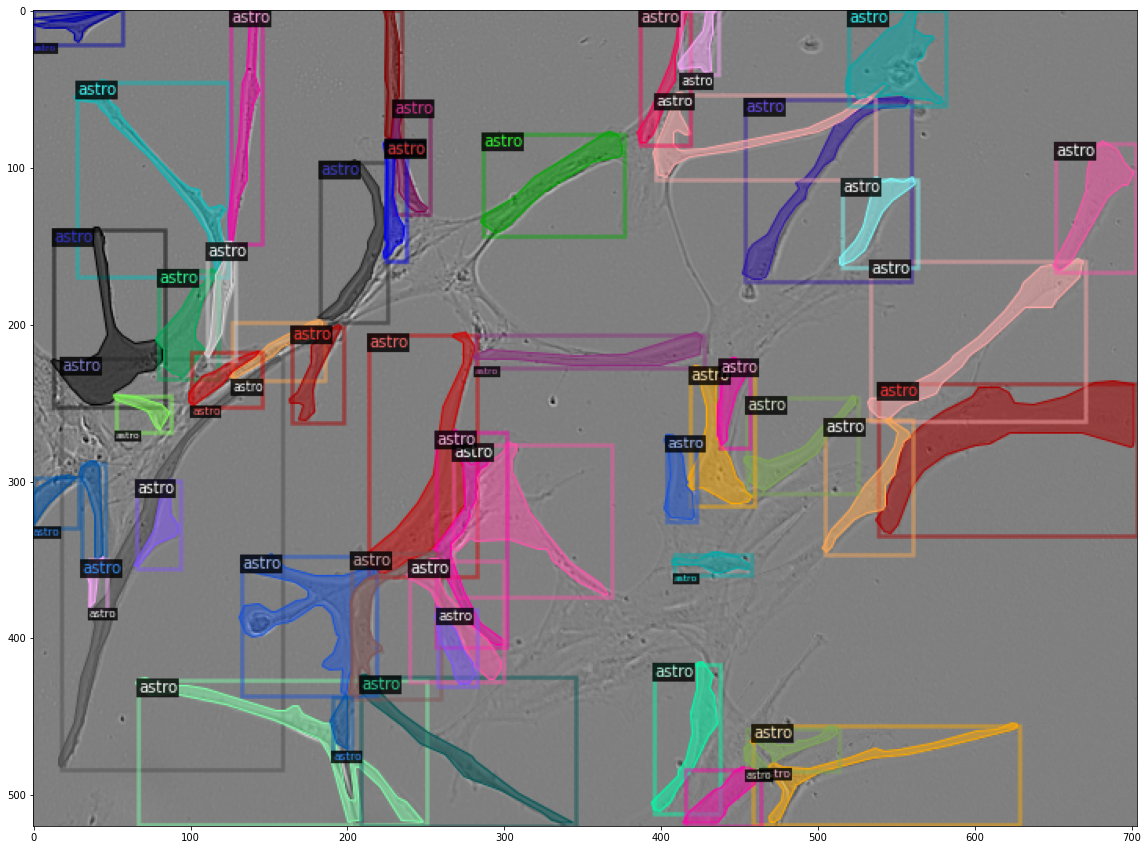

In [12]:
sample = test_ds[25]

img = cv2.imread(sample["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=meta_ds)
out = visualizer.draw_dataset_dict(sample)
plt.figure(figsize = (20,15))
plt.imshow(out.get_image()[:, :, ::-1]);

**Train**

In [13]:
trainer = Trainer(cfg)
trainer.resume_or_load(resume=False)
if cfg.TEST.AUG.ENABLED:
    trainer.register_hooks(
        [hooks.EvalHook(0, lambda: trainer.test_with_TTA(cfg, trainer.model))]
    )
trainer.train()

[12/21 03:35:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): VoVNet(
      (stem): Sequential(
        (stem_1/conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (stem_1/norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        (stem_1/relu): R

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[12/21 03:36:01 fvcore.common.checkpoint]: No checkpoint found. Initializing model from scratch
[12/21 03:36:01 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/opt/conda/lib/python3.7/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/opt/conda/lib/python3.7/site-p

[12/21 03:36:33 d2.utils.events]:  eta: 4:06:55  iter: 19  total_loss: 3.316  loss_mask: 0.6931  loss_maskiou: 0.09886  loss_fcos_cls: 0.9069  loss_fcos_loc: 0.9024  loss_fcos_ctr: 0.6972  time: 1.5466  data_time: 0.0915  lr: 0.00019981  max_mem: 10488M
[12/21 03:37:04 d2.utils.events]:  eta: 4:11:39  iter: 39  total_loss: 2.594  loss_mask: 0.6931  loss_maskiou: 0.06668  loss_fcos_cls: 0.48  loss_fcos_loc: 0.6599  loss_fcos_ctr: 0.6831  time: 1.5546  data_time: 0.0539  lr: 0.00039961  max_mem: 11157M
[12/21 03:37:34 d2.utils.events]:  eta: 4:10:14  iter: 59  total_loss: 2.492  loss_mask: 0.6929  loss_maskiou: 0.01284  loss_fcos_cls: 0.47  loss_fcos_loc: 0.6367  loss_fcos_ctr: 0.6902  time: 1.5370  data_time: 0.0507  lr: 0.00059941  max_mem: 11240M
[12/21 03:38:06 d2.utils.events]:  eta: 4:12:01  iter: 79  total_loss: 2.441  loss_mask: 0.6926  loss_maskiou: 0.008293  loss_fcos_cls: 0.4286  loss_fcos_loc: 0.6163  loss_fcos_ctr: 0.6921  time: 1.5489  data_time: 0.0787  lr: 0.00079921  max

Analysis the learing process and visualization

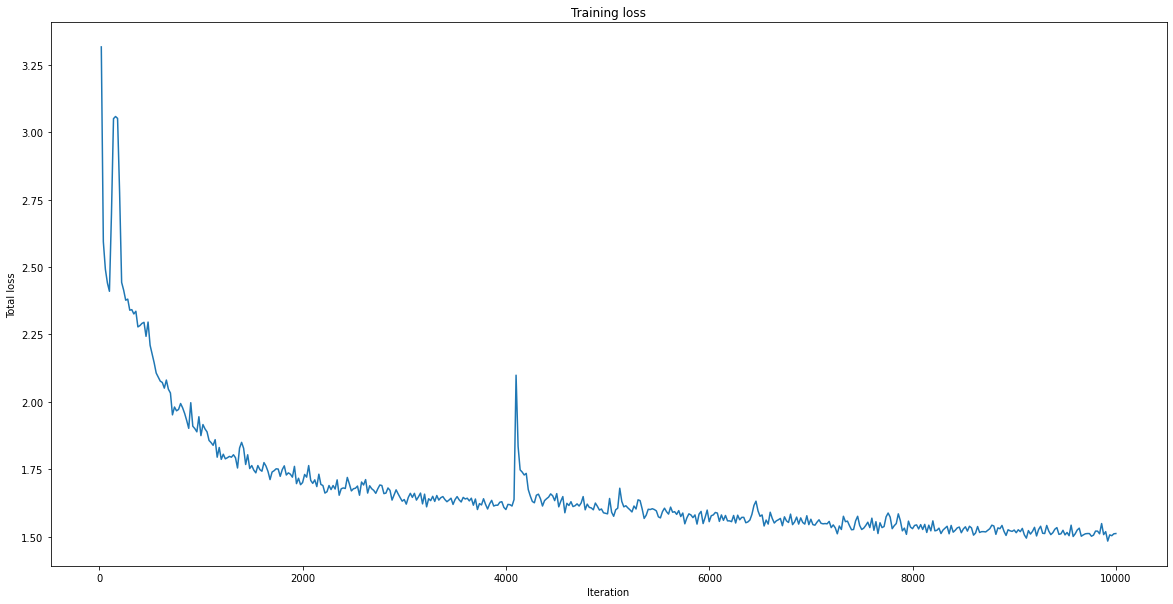

In [14]:
import re
# read log file
with open('./output/log.txt', 'r') as f:
    log = f.read()
# extract training loss
lines = re.findall('iter: [0-9]*  total_loss: [.0-9]*', log)
it, loss = [], []
for i in range(len(lines)):
    res = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", lines[i])
    it.append(int(res[0]))
    loss.append(float(res[1]))
plt.figure(figsize = (20,10))
plt.plot(it, loss)
plt.xlabel('Iteration')
plt.ylabel('Total loss')
plt.title('Training loss');

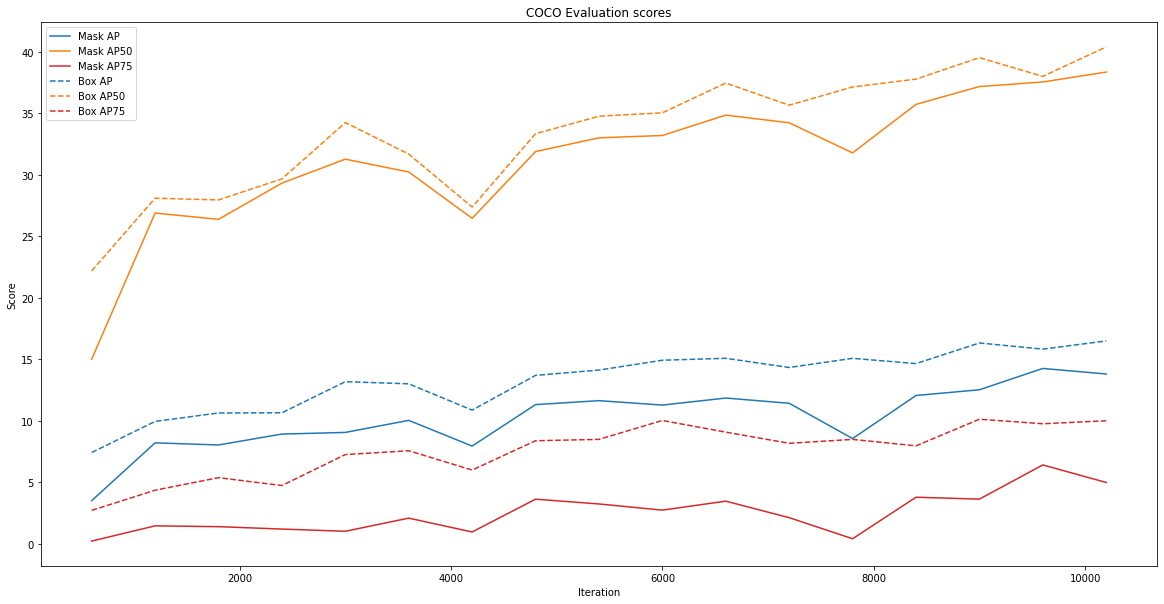

In [15]:
# Then we do evaluation scores
raw = re.findall('copypaste: [.,0-9]*', log)
boxes, segs = [], []
idx = 0
for s in raw:
    if len(s) > 20:
        nums = [float(i) for i in s.strip('copypaste: ').split(',')]
        if idx == 0:
            boxes.append(nums)
        else:
            segs.append(nums)
        idx = (idx + 1) % 2
boxes, segs = np.asarray(boxes), np.asarray(segs)
x = (np.arange(0, len(segs[:,0])) *600) + 600
plt.figure(figsize = (20,10))
x = (np.arange(0, len(segs[:,0])) *600) + 600
plt.plot(x, segs[:,0], label='Mask AP', color='tab:blue')
plt.plot(x, segs[:,1], label='Mask AP50', color='tab:orange')
plt.plot(x, segs[:,2], label='Mask AP75', color='tab:red')
plt.plot(x, boxes[:,0], label='Box AP', linestyle='--', color='tab:blue')
plt.plot(x, boxes[:,1], label='Box AP50', linestyle='--', color='tab:orange')
plt.plot(x, boxes[:,2], label='Box AP75', linestyle='--', color='tab:red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('COCO Evaluation scores');

aaa

**Model check**
 Check a few predictions, code from [Positive score with Detectron 2/3 - Training](https://www.kaggle.com/slawekbiel/positive-score-with-detectron-2-3-training).

[12/21 08:42:08 fvcore.common.checkpoint]: [Checkpointer] Loading from ./output/model_final.pth ...
[12/21 08:42:08 d2.data.datasets.coco]: Loaded 122 images in COCO format from /kaggle/input/livecellcleanastromask/test_fold_0.json


/opt/conda/lib/python3.7/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


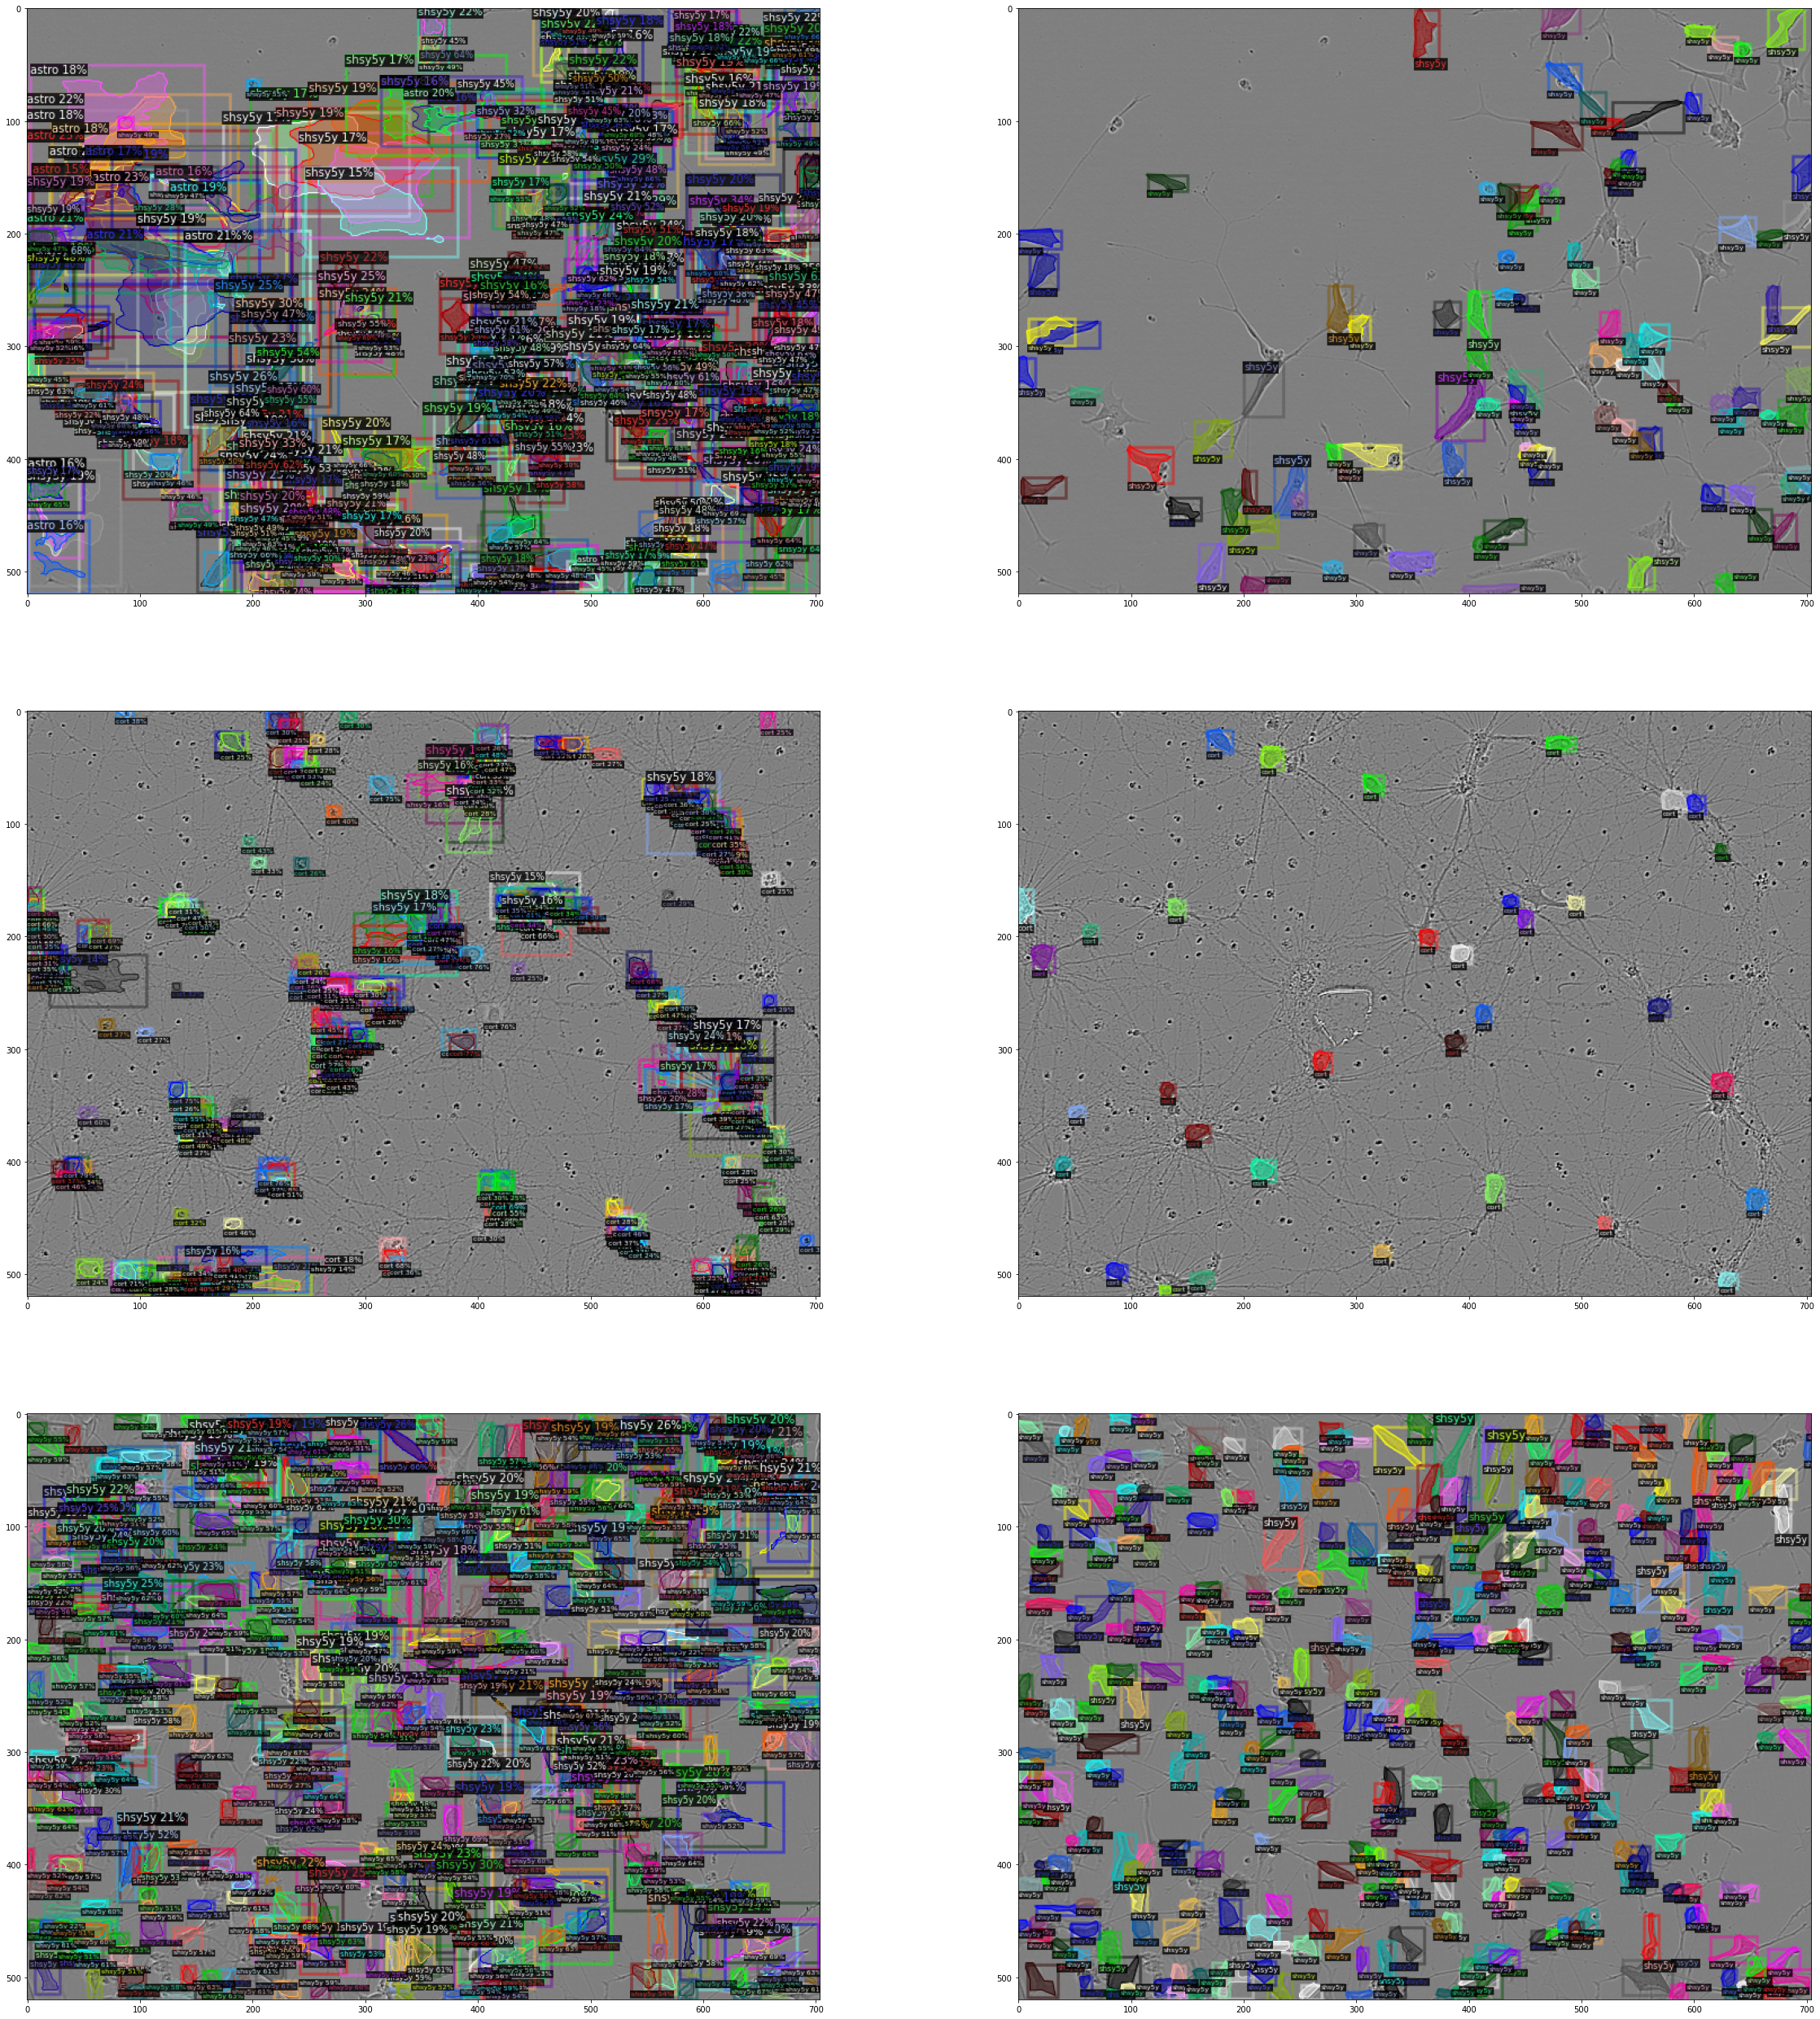

In [16]:
import random

cfg.defrost()
cfg.MODEL.WEIGHTS = './output/model_final.pth'  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
predictor = DefaultPredictor(cfg)
dataset_dicts = DatasetCatalog.get('test')
outs = []
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata = MetadataCatalog.get('test'), 
                    
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out_pred = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    visualizer = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get('test'))
    out_target = visualizer.draw_dataset_dict(d)
    outs.append(out_pred)
    outs.append(out_target)
_,axs = plt.subplots(len(outs)//2,2,figsize=(40,45))
for ax, out in zip(axs.reshape(-1), outs):
    ax.imshow(out.get_image()[:, :, ::-1])

In [17]:
print("no error")

no error
